In [33]:
#Import our libraries 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy as sp
import cufflinks as cf
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
cf.go_offline()

In [2]:
#Import the dataset
data = pd.read_csv('cities dataset.csv')
data.head()

,Cities,Visitors yearly,Visitors to locals ratio,Employment,GDP,GDP per capita,Population,Foreign Population,Land area (km2),Medium Size City Center Apartment Rent,AVG Net Salary,Air Quality score,Urban Greenery score,Life Expectancy,# of Startups
0,Paris,30000000.0,2.34,6031104.44,6.451210e+11,54092.72,12244807.0,2436631.82,105.4,1760.0,33212.08,0.32,0.51,82.43,3933.0
1,London,19233000.0,1.35,6268882.00,6.316394e+11,56184.49,14257962.0,4705127.46,1572.0,2200.0,39762.80,0.35,0.77,81.22,9805.0
2,Milano,12000000.0,2.77,2411689.56,2.511397e+11,49042.31,4336121.0,390250.89,181.8,1320.0,27439.28,0.29,0.40,82.69,355.0
3,Madrid,7000000.0,1.03,2855178.00,2.395026e+11,37049.76,6791667.0,1697916.75,604.3,1056.0,28155.60,0.31,0.58,82.83,1172.0
4,Munich,8800000.0,3.06,1480335.09,1.723709e+11,59869.56,5879107.0,518239.26,310.4,1584.0,42988.00,0.89,0.83,81.04,532.0


In [3]:
#lets explore the data for a bit
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 15 columns):
Cities                                    42 non-null object
Visitors yearly                           42 non-null float64
Visitors to locals ratio                  42 non-null float64
Employment                                42 non-null float64
GDP                                       42 non-null float64
GDP per capita                            42 non-null float64
Population                                42 non-null float64
Foreign Population                        42 non-null float64
Land area (km2)                           42 non-null float64
Medium Size City Center Apartment Rent    42 non-null float64
AVG Net Salary                            42 non-null float64
Air Quality score                         42 non-null float64
Urban Greenery score                      42 non-null float64
Life Expectancy                           42 non-null float64
# of Startups                 

In [4]:
data.corr()

,Visitors yearly,Visitors to locals ratio,Employment,GDP,GDP per capita,Population,Foreign Population,Land area (km2),Medium Size City Center Apartment Rent,AVG Net Salary,Air Quality score,Urban Greenery score,Life Expectancy,# of Startups
Visitors yearly,1.000000,0.470115,0.543319,0.493782,-0.040580,0.463624,0.375083,0.393072,0.062125,-0.172128,-0.446479,-0.309404,0.023398,0.348117
Visitors to locals ratio,0.470115,1.000000,-0.226918,-0.235971,-0.222023,-0.307691,-0.235817,-0.032979,-0.108200,-0.128352,0.024442,0.018511,-0.111066,-0.160384
Employment,0.543319,-0.226918,1.000000,0.978098,0.256351,0.956174,0.881657,0.510750,0.296182,-0.049650,-0.504792,-0.224705,0.151255,0.839355
GDP,0.493782,-0.235971,0.978098,1.000000,0.372156,0.939568,0.884742,0.446053,0.375024,0.014991,-0.451424,-0.179268,0.174783,0.842792
GDP per capita,-0.040580,-0.222023,0.256351,0.372156,1.000000,0.290419,0.321221,0.015964,0.752116,0.658416,0.129231,0.142136,0.344628,0.314462
Population,0.463624,-0.307691,0.956174,0.939568,0.290419,1.000000,0.883135,0.538629,0.266737,-0.031766,-0.481557,-0.180933,0.133673,0.793890
Foreign Population,0.375083,-0.235817,0.881657,0.884742,0.321221,0.883135,1.000000,0.590391,0.354059,0.070160,-0.408437,-0.048933,0.116280,0.909262
Land area (km2),0.393072,-0.032979,0.510750,0.446053,0.015964,0.538629,0.590391,1.000000,0.150932,-0.007205,-0.239246,0.089244,-0.126468,0.560939
Medium Size City Center Apartment Rent,0.062125,-0.108200,0.296182,0.375024,0.752116,0.266737,0.354059,0.150932,1.000000,0.829564,0.129578,0.185648,0.518906,0.423962
AVG Net Salary,-0.172128,-0.128352,-0.049650,0.014991,0.658416,-0.031766,0.070160,-0.007205,0.829564,1.000000,0.353947,0.297659,0.440937,0.079086


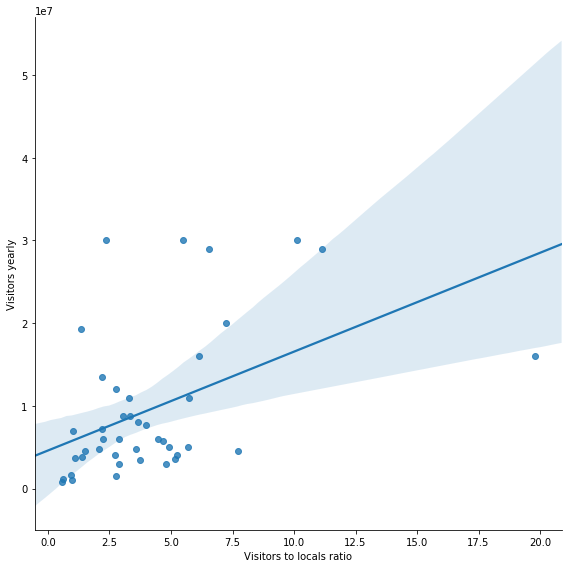

In [5]:
sns.lmplot(x='Visitors to locals ratio',y='Visitors yearly',data=data,height=8)

We can notice high variability in the data, there is a lot of cities like london and Paris their GDP is much higher than maybe 2 or 3 other cities combined. 

And thats why we need to reduce this noise by applython Log Transformation. Log transformation generally results in data with less variability which may help with the analysis.
Let's try it out.

In [6]:
#First lets delete the cities column since we won't need it now
del data['Cities']

In [7]:
data.head()

,Visitors yearly,Visitors to locals ratio,Employment,GDP,GDP per capita,Population,Foreign Population,Land area (km2),Medium Size City Center Apartment Rent,AVG Net Salary,Air Quality score,Urban Greenery score,Life Expectancy,# of Startups
0,30000000.0,2.34,6031104.44,6.451210e+11,54092.72,12244807.0,2436631.82,105.4,1760.0,33212.08,0.32,0.51,82.43,3933.0
1,19233000.0,1.35,6268882.00,6.316394e+11,56184.49,14257962.0,4705127.46,1572.0,2200.0,39762.80,0.35,0.77,81.22,9805.0
2,12000000.0,2.77,2411689.56,2.511397e+11,49042.31,4336121.0,390250.89,181.8,1320.0,27439.28,0.29,0.40,82.69,355.0
3,7000000.0,1.03,2855178.00,2.395026e+11,37049.76,6791667.0,1697916.75,604.3,1056.0,28155.60,0.31,0.58,82.83,1172.0
4,8800000.0,3.06,1480335.09,1.723709e+11,59869.56,5879107.0,518239.26,310.4,1584.0,42988.00,0.89,0.83,81.04,532.0


# Log Transformation

In [8]:
log_data= np.log10(data)

In [9]:
log_data.head()

,Visitors yearly,Visitors to locals ratio,Employment,GDP,GDP per capita,Population,Foreign Population,Land area (km2),Medium Size City Center Apartment Rent,AVG Net Salary,Air Quality score,Urban Greenery score,Life Expectancy,# of Startups
0,7.477121,0.369216,6.780397,11.809641,4.733139,7.087952,6.386790,2.022841,3.245513,4.521296,-0.494850,-0.292430,1.916085,3.594724
1,7.284047,0.130334,6.797190,11.800469,4.749616,7.154057,6.672571,3.196453,3.342423,4.599477,-0.455932,-0.113509,1.909663,3.991448
2,7.079181,0.442480,6.382321,11.399915,4.690571,6.637101,5.591344,2.259594,3.120574,4.438373,-0.537602,-0.397940,1.917453,2.550228
3,6.845098,0.012837,6.455633,11.379310,4.568785,6.831976,6.229916,2.781253,3.023664,4.449565,-0.508638,-0.236572,1.918188,3.068928
4,6.944483,0.485721,6.170360,11.236464,4.777206,6.769311,5.714530,2.491922,3.199755,4.633347,-0.050610,-0.080922,1.908699,2.725912


In [10]:
log_data.describe()

,Visitors yearly,Visitors to locals ratio,Employment,GDP,GDP per capita,Population,Foreign Population,Land area (km2),Medium Size City Center Apartment Rent,AVG Net Salary,Air Quality score,Urban Greenery score,Life Expectancy,# of Startups
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,6.808691,0.495927,5.957949,10.901598,4.609992,6.350418,5.584426,2.265146,3.054688,4.506977,-0.234376,-0.173822,1.909298,2.454117
std,0.404735,0.337670,0.335085,0.362730,0.116741,0.350420,0.439447,0.443849,0.164194,0.163099,0.168988,0.168803,0.011850,0.528107
min,5.923762,-0.259637,5.380280,10.272168,4.413819,5.765338,4.477121,1.202216,2.707911,4.181599,-0.657577,-1.000000,1.867055,1.477121
25%,6.585353,0.340939,5.680435,10.582259,4.508423,6.033018,5.341876,1.997417,2.985875,4.406017,-0.296772,-0.187087,1.908726,2.179651
50%,6.778151,0.519826,5.956596,10.898442,4.636380,6.353144,5.571304,2.266876,3.023664,4.521980,-0.183771,-0.133803,1.910197,2.407250
75%,7.069734,0.718282,6.162096,11.140541,4.708563,6.611080,5.884799,2.614008,3.141595,4.580388,-0.099659,-0.069357,1.916085,2.744937
max,7.477121,1.296226,6.797190,11.809641,4.792049,7.154057,6.672571,3.196453,3.391641,4.898725,-0.004365,0.000000,1.920958,3.991448


In this table we can find information about our data and variables after the log transformation, the count column represents the sample number, the mean column represents the average values for each column, the std column represents the standard deviation which is the how much the numbers of a variable differ from the mean value for that variable, while the min and max column represents the minimum and maximum values in each variable, lastly the 25%, 50%, 75%, It describes the distribution of the data. 50% should be a value that describes the median of the data. 25% and 75% is the border of the upper/lower quarter of the data. We can get an idea of how skew our data is, for instance, note that for the ‘Visitors yearly’ the mean is higher than the median, which means our data is right skewed in this case.

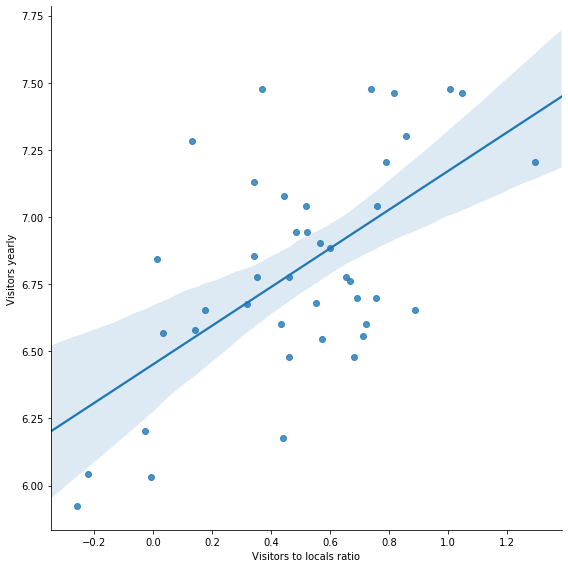

In [11]:
#lets try and print again to see the results 
sns.lmplot(x='Visitors to locals ratio',y='Visitors yearly',data=log_data,height=8)

Excellent, now the data has a lower variability. 

In [12]:
#lets test our correlation again 
log_data.corr()

,Visitors yearly,Visitors to locals ratio,Employment,GDP,GDP per capita,Population,Foreign Population,Land area (km2),Medium Size City Center Apartment Rent,AVG Net Salary,Air Quality score,Urban Greenery score,Life Expectancy,# of Startups
Visitors yearly,1.000000,0.600480,0.598878,0.563646,0.066380,0.443418,0.459718,0.322822,0.134310,-0.081501,-0.338681,-0.094943,0.023482,0.481539
Visitors to locals ratio,0.600480,1.000000,-0.261808,-0.257476,-0.053529,-0.400532,-0.195207,-0.002996,-0.009319,-0.026060,0.180561,0.191188,-0.168845,-0.027247
Employment,0.598878,-0.261808,1.000000,0.947226,0.213078,0.926125,0.742737,0.408667,0.214961,-0.024320,-0.538930,-0.247101,0.184673,0.637456
GDP,0.563646,-0.257476,0.947226,1.000000,0.441337,0.911280,0.811258,0.383939,0.410955,0.165032,-0.500644,-0.210503,0.293859,0.665201
GDP per capita,0.066380,-0.053529,0.213078,0.441337,1.000000,0.253709,0.433229,0.059556,0.768243,0.722769,0.088119,0.148765,0.361897,0.465242
Population,0.443418,-0.400532,0.926125,0.911280,0.253709,1.000000,0.764027,0.407817,0.204064,0.013246,-0.498292,-0.231809,0.166557,0.542648
Foreign Population,0.459718,-0.195207,0.742737,0.811258,0.433229,0.764027,1.000000,0.522313,0.356944,0.253472,-0.426858,-0.097624,0.158924,0.600866
Land area (km2),0.322822,-0.002996,0.408667,0.383939,0.059556,0.407817,0.522313,1.000000,0.006890,-0.006225,-0.099547,0.160352,-0.310298,0.409523
Medium Size City Center Apartment Rent,0.134310,-0.009319,0.214961,0.410955,0.768243,0.204064,0.356944,0.006890,1.000000,0.843225,0.095681,0.216966,0.636903,0.487180
AVG Net Salary,-0.081501,-0.026060,-0.024320,0.165032,0.722769,0.013246,0.253472,-0.006225,0.843225,1.000000,0.314924,0.323682,0.524459,0.284502


We will need to elemenate any variable that has low correlation with our independent variable (Visitors yearly) < 0.5

In [13]:
log_data.columns

Index(['Visitors yearly', 'Visitors to locals ratio', 'Employment', 'GDP',
       'GDP per capita', 'Population', 'Foreign Population', 'Land area (km2)',
       'Medium Size City Center Apartment Rent', 'AVG Net Salary',
       'Air Quality score', 'Urban Greenery score', 'Life Expectancy',
       '# of Startups'],
      dtype='object')

In [14]:
#creating a dataframe with the important variables only
df = log_data[['Visitors yearly', 'Visitors to locals ratio', 
              'Employment', 'GDP']]

In [15]:
df.head()

,Visitors yearly,Visitors to locals ratio,Employment,GDP
0,7.477121,0.369216,6.780397,11.809641
1,7.284047,0.130334,6.797190,11.800469
2,7.079181,0.442480,6.382321,11.399915
3,6.845098,0.012837,6.455633,11.379310
4,6.944483,0.485721,6.170360,11.236464


In [16]:
#Let's do some plots to get familiar with the data

The next graph is showing a boxplot for each of the selected variables. A boxplot is a graph that gives you a good indication of how the values in the data are spread out. Boxplots are a standardized way of displaying the distribution of data based on a five-number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

In [17]:
df.iplot(kind='box')

Median (50th Percentile) is the middle value of the dataset, first quartile (Q1/25th Percentile) is the middle number between the smallest number (not the “minimum”) and the median of the dataset, third quartile (Q3/75th Percentile) is the middle value between the median and the highest value (not the “maximum”) of the dataset, interquartile range (IQR) is the 25th to the 75th percentile and outliers (shown as green circles), in our figure we can see that there is no outliers and that and that most of the variables are normally distributed. 

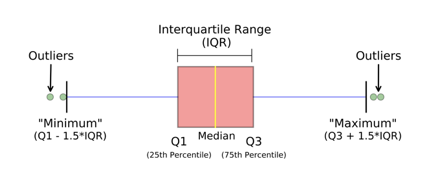

In the following figure we can see a line char for all the variables and it shows how high the GDP numbers are in compare to other variables, it also shows variability in all the other variables but not in the GDP line representation that looks like a straight one.

In [18]:
df.iplot()

Since our dependent variable ‘y’ in our regression model is the number of visitors, in the next following graphs we will be comparing the number of visitors to the other variables on a scatter plot for data visualization and interpretation.

(0, 4)

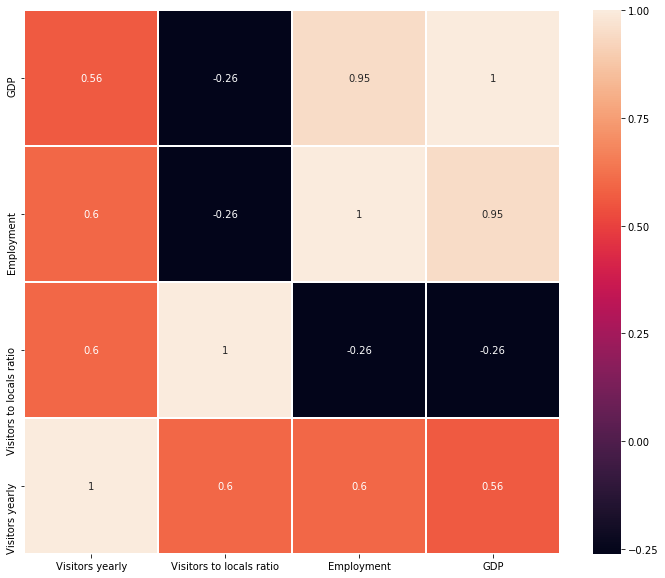

In [50]:
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5)
ax.set_ylim([0,4])

In [19]:
df.columns

Index(['Visitors yearly', 'Visitors to locals ratio', 'Employment', 'GDP'], dtype='object')

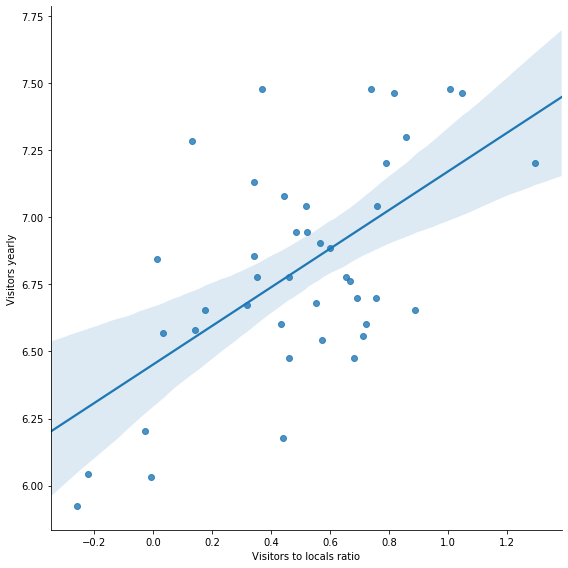

In [20]:
sns.lmplot(x='Visitors to locals ratio',y='Visitors yearly',data=df,height=8)

we can see the relationship between visitors yearly and visitors to locals ratio, there is a positive correlation, what does a “positive relationship” mean in this context? It means that, in general, higher scores on one variable tend to be paired with higher scores on the other and that lower scores on one variable tend to be paired with lower scores on the other, as in a lot of cases when Visitors to locals ratio increase in a city, number of visitors also increase.

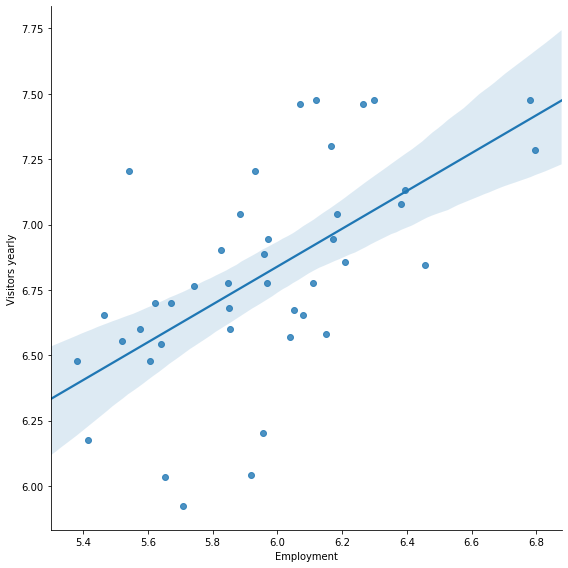

In [21]:
sns.lmplot(x='Employment',y='Visitors yearly',data=df,height=8)

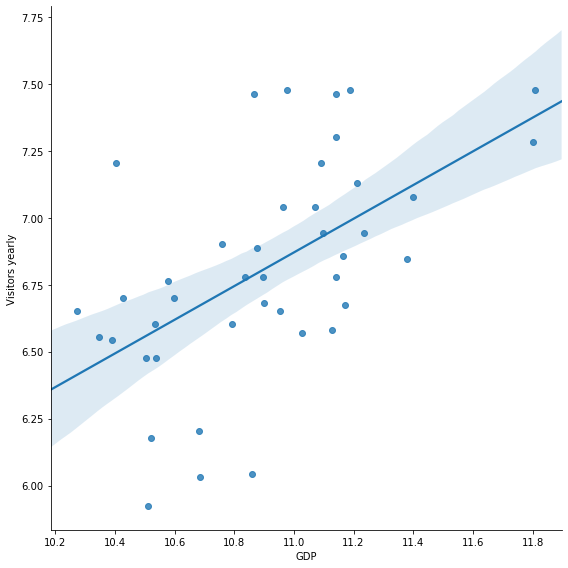

In [22]:
sns.lmplot(x='GDP',y='Visitors yearly',data=df,height=8)

# Simple linear Regression

Time to make our Simple linear regression model.
The linear regression equation has the form y= a + bx, where ‘y’ is the dependent variable, what we are trying to investigate and predict, ‘x’ is the independent variable, all the variables that will help us predict ‘y’, while ‘b’ is the slope of the line and ‘a’ is the y-intercept.

First thing we will try to do is to run a simple linear regression model on the most correlated variable with yearly visitors which is visitors to locals ratio, we will be doing this using the OLS method. 
 
I will be doing the analysis with two models. Statsmodel and Sklearn, the reason why i'm doing this is because Statsmodel provides us with an amazing summary to meausre our model in a very few lines of code. 

For the sklearn model, we will be using a train sample of 50% of the data sample which equals 21 observations, keeping 50% for the testing and predicting model, which is another 21 observations. 

In [23]:
y = df['Visitors yearly']
x1= df[['Visitors to locals ratio']]

In [24]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.5, random_state=101)

In [25]:
x = sm.add_constant(x1_train)
results = sm.OLS(y_train,x).fit() 
results.summary()

/Users/yasserimam/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Visitors yearly   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     23.01
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           0.000125
Time:                        17:47:44   Log-Likelihood:                -3.1033
No. Observations:                  21   AIC:                             10.21
Df Residuals:                      19   BIC:                             12.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        6.3657      0.128     49.824      0.000       6.098       6.633
Visitors to locals ratio     1.0087      0.210      4.797      0.000       0.569       1.449
==============================================================================
Omnibus:                        2.924   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                1.313
Skew:                           0.523   Prob(JB):                        0.519
Kurtosis:                       3.638   Cond. No.                         4.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Results Interpretation 

To interpret the results, we will start by explaining what the data refers to;

•	The Standard Error (std err), is an indication of the reliability of the mean. A small std err is an indication that the sample mean is a more accurate reflection of the actual population mean. A larger sample size will normally result in a smaller std err.

•	The significance help determine whether the relationships that we observe in our sample also exist in the larger population. This is represented by the p-value, the value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. It is standard practice to use the p-values to decide whether to include variables in the final model. For the results above, we would consider working with all the variables that their p value is less than 0.05 (95% confidence level), the variables are, visitors to locals ratio, Employment. GDP, and number of startups. Based on that, keeping values that their p value is bigger than 0.05 significance level can reduce the model’s precision.

•	The regression coefficient  are estimates of the actual population parameters. To obtain unbiased coefficient estimates that have the minimum variance, and to be able to trust the p-values, our model must satisfy the six classical assumptions of OLS linear regression. The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable. A positive sign indicates that as the predictor variable increases, the response variable also increases. A negative sign indicates that as the predictor variable increases, the response variable decreases. 

From the table above we have concluded that for a simple linear regression the best variable to fit the data is ‘Visitors to locals ratio’ as it has the lowest p value and the lowest standard error. Hence, our prediction equation would be represented as following: 
Y = 6.3647 + 1.0082 * X , 
It also can be: visitors yearly = 6.3647 + 1.0082 * visitors to locals ration

The equation is telling us that visitors each year is predicted to increase 1.0082 times when the visitors to locals ratio variable goes up by one.

•	R-squared is a measure of fitness for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between the model and the dependent variable on a convenient (0 – 1) scale. An R-squared equal zero means that a model does not explain any of the variation in the response variable around its mean, while an R-squared equals one represents a model that explains all of the variation in the response variable around its mean. Usually, the larger the R2, the better the regression model fits our observations. In practice, we will never see a regression model with an R2 of 100%. In general, studies that try to explain human behavior like ours generally have R2 values less than 50%. Therefore, our model is a good fit. 

•	Adj. R-squared: since R-squared tends to reward us for including too many independent variables in a regression model, and it doesn’t provide any incentive to stop adding more. Adjusted R-squared use different approaches to help us fight that impulse to add too many. The protection that adjusted R-squared provide is critical because too many terms in a model can produce results that you can’t trust. These statistics help us include the correct number of independent variables in our regression model. We use adjusted R-squared to compare the goodness-of-fit for regression models that contain differing numbers of independent variables. For instance, if we are comparing a model with five independent variables to a model with one variable and the five variable model has a higher R-squared. Is the model with five variables actually a better model, or does it just have more variables? To determine this, we need to compare the adjusted R-squared values. The adjusted R-squared adjusts for the number of variables in the model. Importantly, its value increases only when the new variable improves the model fit but starts to decrease when a new variable doesn’t improve the model fit by a sufficient amount. Hence, we won’t be interpreting the Adj. R-squared value now, we will in the next part when we implement a multiple linear regression. 

•	The F-statistic value in regression is the result of a test where the null hypothesis is that all of the regression coefficients are equal to zero. In other words, the f-test decides whether our added variables improve the model or not, usually a higher f-statistic is better.

•	Prob(F-Statistic): This tells the overall significance of the regression. This is to assess the significance level of all the variables together unlike the t-statistic that measures it for individual variables. Usually when the value is closer to zero, it implies that overall the regressions is strong and meaningful.

•	AIC/BIC: It stands for Akaike’s Information Criteria and is used for model selection. It penalizes the errors mode in case a new variable is added to the regression equation. It is calculated as number of parameters minus the likelihood of the overall model. A lower AIC implies a better model. Whereas, BIC stands for Bayesian information criteria and is a variant of AIC where penalties are made more severe. In general, a lower BIC means that a model is considered to be more likely to be the true model. Our AIC and BIC is not that low which means that the model can get better. 
Log-likelihood values cannot be used alone as an index of fit because they are a function of sample size but can be used to compare the fit of different coefficients. Because we want to maximize the log-likelihood, the higher value is better. For example, a log-likelihood value of -3 is better than -7. We will discuss this more in the multiple linear regression Model.

•	Covariance type: In statistics, robust regression is a form of regression analysis designed to overcome some limitations of traditional parametric and non-parametric methods. OLS has favorable properties if its underlying assumptions are true, but can give misleading results if those assumptions are not true; thus, OLS is said to be not robust to violations of its assumptions. 

•	The t-statistic(t) is the coefficient divided by its standard error and is used in hypothesis testing via Student's t-test. The regression software compares the t statistic on our variable with values in the Student's t distribution to determine the P value, which is the number that we really need to be looking at. 

•	Omnibus test whether the explained variance in a set of data is significantly greater than the unexplained variance, overall. One example is the F-test in the analysis of variance. There can be legitimate significant effects within a model even if the omnibus test is not significant. We usually hope to see a relatively small number. 

•	Prob(Omnibus) is one of the assumptions of OLS is that the errors are normally distributed. Omnibus test is performed in order to check this. Here, the null hypothesis is that the errors are normally distributed. Prob(Omnibus) is supposed to be close to 1 in order for it to satisfy the OLS assumption. In this case Prob(Omnibus) is 0.214, which is not perfect but is acceptable. 

•	Durbin-watson: Another assumption of OLS is of homoscedasticity. This implies that the variance of errors is constant. A value between 1 to 2 is preferred. Here, it is ~2 implying that the regression results are acceptable from the interpretation side of this metric.

•	Jarque-Bera (JB)/Prob(JB) should be in line with the Omnibus test. It is also performed for the distribution analysis of the regression errors. It is supposed to agree with the results of Omnibus test. 

•	The condition number (Cond. No.) measures the sensitivity of a function’s output to its input. When two predictor variables are highly correlated, which is called multicollinearity, the coefficients or factors of those predictor variables can fluctuate erratically for small changes in the data, or the model. Ideally, similar models should be similar. Multicollinearity can produce inaccurate results. We hope to see a relatively small number. 

•	Skew is a measure of data symmetry. We want to see something close to zero, indicating the residual distribution is normal. This value also drives the Omnibus. This result has a small value, and therefore good, skew.

•	Kurtosis is a measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers.

Overall our model is significant, it has a good R2 value, p value and Prob(F-Statistic) values are close to zero, The model also has a relatively small standard error. 

In [26]:
x_test = sm.add_constant(x1_test)
x_test.head()

,const,Visitors to locals ratio
1,1.0,0.130334
26,1.0,0.518514
20,1.0,0.459392
16,1.0,0.033424
29,1.0,-0.026872


In [27]:
lm = LinearRegression()
lm.fit(x,y_train) 
predictions = lm.predict(x_test)

In [28]:
new = pd.DataFrame({'Predictions':predictions,'True':y_test})
new.head()

,Predictions,True
1,6.497179,7.284047
26,6.888734,7.041393
20,6.829099,6.778151
16,6.399427,6.568202
29,6.338607,6.204120


In [29]:
new.corr()

,Predictions,True
Predictions,1.000000,0.470636
True,0.470636,1.000000


/Users/yasserimam/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



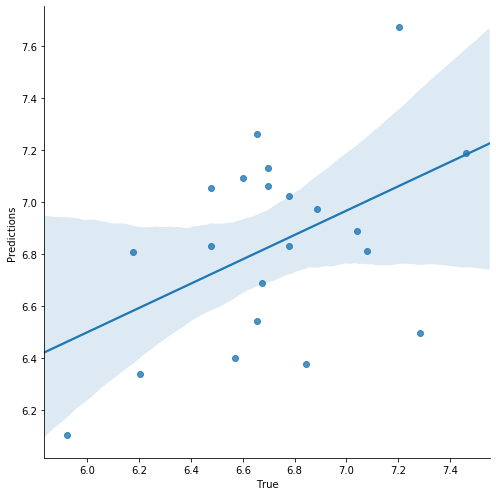

In [30]:
sns.lmplot(x='True',y='Predictions',data=new,size=7)

In this graph we are presenting the relationship between the true data we have and the prediction data resulted from the model, we can notice a positive but not strong correlation equals r = 0.47.

# Measuring Model Accuracy 

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3264343452375157
MSE: 0.1509610170639711
RMSE: 0.38853702148440256



1.Mean Absolute Error (MAE): measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight, MAE does not indicate underperformance or overperformance of the model. Each residual contributes proportionally to the total amount of error, meaning that larger errors will contribute linearly to the overall error. A small MAE suggests the model is great at prediction, while a large MAE suggests that the model may have trouble in certain areas. A MAE of 0 means that the model is a perfect predictor of the outputs (but this will almost never happen). Our average error, MAE is 0.325, which means that our model is working good towards predicting but it can get better

2.Mean Squared Error (MSE): it measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual value. This ultimately means that outliers in our data will contribute to much higher total error in the MSE than they would the MAE, Our MSE= 0.15, which means it stands well against outliers. 

3.Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. 

Our error rate, RMSE = 0.388, usually any error rate bigger than 0.5 is considered as a bad prediction model, which means that our model is somewhat a good fit.


## In the next part we will be exploring a Multiple Linear Regression